Silhouette Score: 0.254535068667672


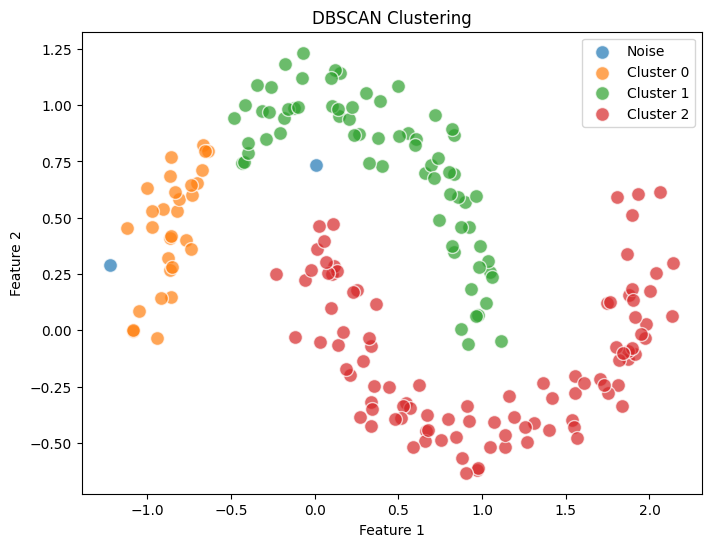

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generate sample data (you can replace this with your own data)
data, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# DBSCAN clustering implementation
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels

# Run DBSCAN clustering with different parameters
eps = 0.2  # Adjust the value of eps
min_samples = 5
labels = dbscan_clustering(data, eps, min_samples)

# Check if more than one cluster is formed
unique_labels = np.unique(labels)
if len(unique_labels) > 1:
    # Measure clustering quality using Silhouette Score
    silhouette_avg = silhouette_score(data, labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Only one cluster detected. Adjust DBSCAN parameters.")

# Plot the results with a legend
plt.figure(figsize=(8, 6))
for label in unique_labels:
    label_name = 'Noise' if label == -1 else f'Cluster {label}'
    plt.scatter(data[labels == label, 0], data[labels == label, 1], label=label_name, alpha=0.7, edgecolors='w', s=100)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Silhouette Score: -0.07349238758780212


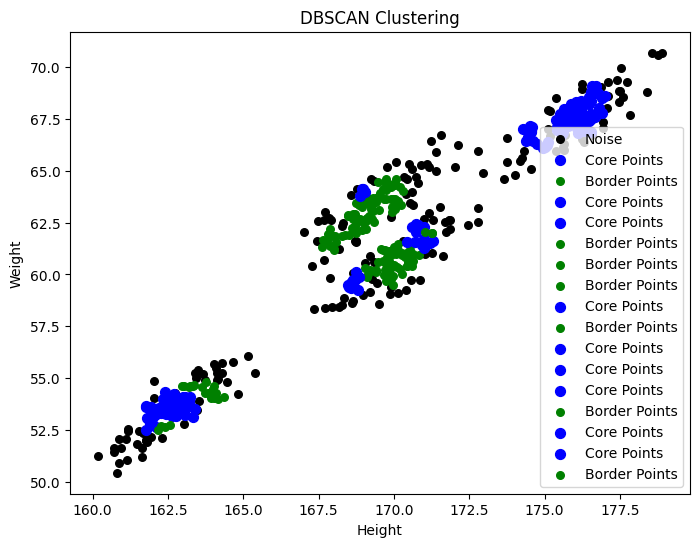

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load data from CSV
data = pd.read_csv("/content/Clustering_gmm (2).csv")

# Extract relevant columns for clustering
features = data[['Height', 'Weight']].values

# DBSCAN clustering implementation
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels, dbscan

# Run DBSCAN clustering
eps = 0.3
min_samples = 5
labels, dbscan = dbscan_clustering(features, eps, min_samples)

# Measure clustering quality using Silhouette Score
silhouette_avg = silhouette_score(features, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Identify core points, border points, and noise points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Create a list of colors for different point types
colors = ['blue', 'green', 'red', 'black']

# Plot the results
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    if label == -1:
        # Plot noise points in black
        plt.scatter(features[labels == label][:, 0], features[labels == label][:, 1], color=colors[3], s=30, label='Noise')
    else:
        if core_samples_mask[label]:
            # Plot core points in blue
            plt.scatter(features[labels == label][:, 0], features[labels == label][:, 1], color=colors[0], s=50, label='Core Points')
        else:
            # Plot border points in green
            plt.scatter(features[labels == label][:, 0], features[labels == label][:, 1], color=colors[1], s=30, label='Border Points')

plt.title('DBSCAN Clustering')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()
